In [4]:
import tensorflow as tf
import numpy as np

In [2]:
ex1 = np.loadtxt("ex1.txt")

In [11]:
print(ex1.shape)
print(ex1[:10,:])

#x_data = ex1[:,:2]
x_data = ex1[:,1]
x_data = x_data[:,np.newaxis]
y_data = ex1[:,2]
print(x_data.shape)
print(y_data.shape)

(200, 3)
[[1.       0.635975 4.093119]
 [1.       0.552438 3.804358]
 [1.       0.855922 4.456531]
 [1.       0.083386 3.187049]
 [1.       0.975802 4.506176]
 [1.       0.181269 3.171914]
 [1.       0.129156 3.053996]
 [1.       0.605648 3.974659]
 [1.       0.301625 3.542525]
 [1.       0.698805 4.234199]]
(200, 1)
(200,)


In [13]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=[None,1])
    y = tf.placeholder(tf.float32, shape=None)
    
    w = tf.Variable([[0]], dtype=tf.float32, name='weight')
    b = tf.Variable(0, dtype=tf.float32, name='bias')
    
    y_hat = tf.matmul(w, tf.transpose(x)) + b
    
    loss = tf.reduce_mean(tf.square(y - y_hat))
     
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
    train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(100000):
            sess.run(train, feed_dict={x:x_data, y:y_data})
            if (step % 5000 == 0):
                print(step, sess.run([w, b]))
        print(step, sess.run([w, b]))

0 [array([[0.02007098]], dtype=float32), 0.03825048]
5000 [array([[1.6656431]], dtype=float32), 3.0093477]
10000 [array([[1.6685958]], dtype=float32), 3.0078063]
15000 [array([[1.6685958]], dtype=float32), 3.0078063]
20000 [array([[1.6685958]], dtype=float32), 3.0078063]
25000 [array([[1.6685958]], dtype=float32), 3.0078063]
30000 [array([[1.6685958]], dtype=float32), 3.0078063]
35000 [array([[1.6685958]], dtype=float32), 3.0078063]
40000 [array([[1.6685958]], dtype=float32), 3.0078063]
45000 [array([[1.6685958]], dtype=float32), 3.0078063]
50000 [array([[1.6685958]], dtype=float32), 3.0078063]
55000 [array([[1.6685958]], dtype=float32), 3.0078063]
60000 [array([[1.6685958]], dtype=float32), 3.0078063]
65000 [array([[1.6685958]], dtype=float32), 3.0078063]
70000 [array([[1.6685958]], dtype=float32), 3.0078063]
75000 [array([[1.6685958]], dtype=float32), 3.0078063]
80000 [array([[1.6685958]], dtype=float32), 3.0078063]
85000 [array([[1.6685958]], dtype=float32), 3.0078063]
90000 [array(

In [51]:
def loadDataSet(fileName, sep='\t', header=False):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split(sep)) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        if header:
            header = False
            continue
        lineArr =[]
        curLine = line.strip().split(sep)
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [6]:
xArr, yArr=loadDataSet("data-01-test-score.csv", ',')

In [7]:
x_data = np.array(xArr)
y_data = np.array(yArr)
y_data = y_data[:,np.newaxis]
print(x_data.shape)
print(y_data.shape)
print(x_data[:10,:])
print(y_data[:10,:])

(25, 3)
(25, 1)
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]]


0 30610.8 [array([[-0.3643104 ],
       [ 0.76964194],
       [ 0.30568007]], dtype=float32), array([-0.5013742], dtype=float32)]
10000 6.034467 [array([[0.33027667],
       [0.55152464],
       [1.1375004 ]], dtype=float32), array([-0.50903434], dtype=float32)]
20000 6.0181184 [array([[0.3538421 ],
       [0.53302735],
       [1.1328533 ]], dtype=float32), array([-0.5239355], dtype=float32)]
30000 6.0158563 [array([[0.35576543],
       [0.5319311 ],
       [1.1322349 ]], dtype=float32), array([-0.53883666], dtype=float32)]
40000 6.013704 [array([[0.35596377],
       [0.5319172 ],
       [1.1322328 ]], dtype=float32), array([-0.55356425], dtype=float32)]
50000 6.011614 [array([[0.35601526],
       [0.5319555 ],
       [1.1323177 ]], dtype=float32), array([-0.56786937], dtype=float32)]
60000 6.0095477 [array([[0.3560424],
       [0.5319894],
       [1.1324303]], dtype=float32), array([-0.5821745], dtype=float32)]
70000 6.0074754 [array([[0.35605654],
       [0.5320228 ],
       [1.13255

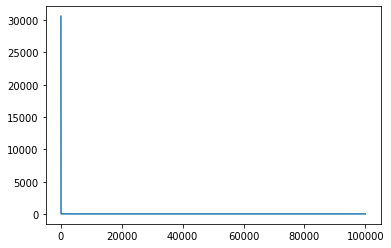

In [48]:
import matplotlib.pyplot as plt

with tf.Graph().as_default():
    #tf.set_random_seed(77777)

    x = tf.placeholder(tf.float32, shape=[None,3])
    y = tf.placeholder(tf.float32, shape=[None,1])
    
    W = tf.Variable(tf.random_normal([3,1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
    
    y_hat = tf.matmul(x, W) + b
    
    loss = tf.reduce_mean(tf.square(y - y_hat))
     
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
    train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        cost_history = []
        for step in range(100000):
            cost, hypothesis, _ = sess.run([loss, y_hat, train], 
                                           feed_dict={x:x_data, y:y_data})
            cost_history.append(cost)
            if (step % 10000 == 0):
                print(step, cost, sess.run([W, b]))
        print(step, cost, sess.run([W, b]))
        
        print("Your score will be ", 
              sess.run(y_hat, feed_dict={x:[[60,70,110],[90,100,80]]}))
        
        plt.plot(cost_history)
        plt.show()

In [52]:
xArr, yArr=loadDataSet("concrete.csv", ',', True)

In [53]:
x_data = np.array(xArr)
y_data = np.array(yArr)
y_data = y_data[:,np.newaxis]
print(x_data.shape)
print(y_data.shape)
print(x_data[:10,:])
print(y_data[:10,:])

(1030, 8)
(1030, 1)
[[ 141.3  212.     0.   203.5    0.   971.8  748.5   28. ]
 [ 168.9   42.2  124.3  158.3   10.8 1080.8  796.2   14. ]
 [ 250.     0.    95.7  187.4    5.5  956.9  861.2   28. ]
 [ 266.   114.     0.   228.     0.   932.   670.    28. ]
 [ 154.8  183.4    0.   193.3    9.1 1047.4  696.7   28. ]
 [ 255.     0.     0.   192.     0.   889.8  945.    90. ]
 [ 166.8  250.2    0.   203.5    0.   975.6  692.6    7. ]
 [ 251.4    0.   118.3  188.5    6.4 1028.4  757.7   56. ]
 [ 296.     0.     0.   192.     0.  1085.   765.    28. ]
 [ 155.   184.   143.   194.     9.   880.   699.    28. ]]
[[29.89]
 [23.51]
 [29.22]
 [45.85]
 [18.29]
 [21.86]
 [15.75]
 [36.64]
 [21.65]
 [28.99]]


0 814371.7 [array([[-1.2788835 ],
       [-0.18400522],
       [ 0.41420177],
       [ 0.28384274],
       [-0.7842654 ],
       [-0.2845155 ],
       [ 1.7950554 ],
       [ 1.5068386 ]], dtype=float32), array([0.5301146], dtype=float32)]
10000 3530.903 [array([[-0.07340842],
       [-0.03832367],
       [ 0.05224214],
       [ 0.13602856],
       [-0.77951294],
       [-0.25192946],
       [ 0.3160808 ],
       [ 0.806584  ]], dtype=float32), array([0.52961266], dtype=float32)]
20000 757.7477 [array([[ 0.07219207],
       [ 0.04889159],
       [ 0.07868185],
       [ 0.06513165],
       [-0.76674515],
       [-0.10017063],
       [ 0.10154983],
       [ 0.41944262]], dtype=float32), array([0.52961266], dtype=float32)]
30000 285.4021 [array([[ 0.1061527 ],
       [ 0.08069407],
       [ 0.10730462],
       [ 0.01111071],
       [-0.75636697],
       [-0.05195961],
       [ 0.04688441],
       [ 0.2367055 ]], dtype=float32), array([0.52961266], dtype=float32)]
40000 184.09781 [array([[

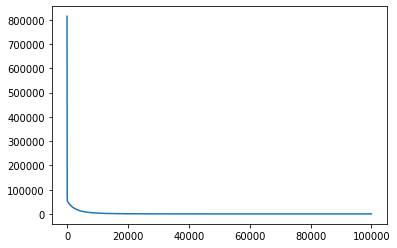

In [62]:
import matplotlib.pyplot as plt

with tf.Graph().as_default():
    #tf.set_random_seed(77777)

    x = tf.placeholder(tf.float32, shape=[None,8])
    y = tf.placeholder(tf.float32, shape=[None,1])
    
    W = tf.Variable(tf.random_normal([8,1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
    
    y_hat = tf.matmul(x, W) + b
    
    loss = tf.reduce_mean(tf.square(y - y_hat))
     
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-8)
    train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        cost_history = []
        for step in range(100000):
            cost, hypothesis, _ = sess.run([loss, y_hat, train], 
                                           feed_dict={x:x_data, y:y_data})
            cost_history.append(cost)
            if (step % 10000 == 0):
                print(step, cost, sess.run([W, b]))
        print(step, cost, sess.run([W, b]))        
        
        plt.plot(cost_history)
        plt.show()

In [64]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

x_data = np.array(MinMaxScaler(xArr))
y_data = np.array(MinMaxScaler(yArr))
y_data = y_data[:,np.newaxis]
print(x_data.shape)
print(y_data.shape)
print(x_data[:10,:])
print(y_data[:10,:])

(1030, 8)
(1030, 1)
[[0.08972603 0.58987201 0.         0.65255591 0.         0.49651163
  0.38760662 0.07417582]
 [0.15273973 0.11741792 0.6211894  0.29153355 0.33540373 0.81337209
  0.50727546 0.03571429]
 [0.33789954 0.         0.47826087 0.52396166 0.17080745 0.45319767
  0.67034621 0.07417582]
 [0.37442922 0.31719533 0.         0.84824281 0.         0.38081395
  0.19066734 0.07417582]
 [0.12054795 0.51029494 0.         0.57108626 0.28260869 0.71627907
  0.25765178 0.07417582]
 [0.34931507 0.         0.         0.56070287 0.         0.25813953
  0.88058204 0.24450549]
 [0.14794521 0.69616027 0.         0.65255591 0.         0.50755814
  0.24736578 0.01648352]
 [0.34109589 0.         0.5912044  0.5327476  0.19875776 0.66104651
  0.41068741 0.1510989 ]
 [0.44292237 0.         0.         0.56070287 0.         0.8255814
  0.42900151 0.07417582]
 [0.12100457 0.51196438 0.71464268 0.57667732 0.2795031  0.22965116
  0.26342198 0.07417582]]
[[0.34334122]
 [0.26385947]
 [0.33499439]
 [0.5421

0 3.6162431 [array([[-1.0817243 ],
       [-0.88060766],
       [-0.25304857],
       [ 1.7845155 ],
       [-2.0475903 ],
       [-0.6278015 ],
       [ 0.79966027],
       [-0.24940997]], dtype=float32), array([-1.0757781], dtype=float32)]
10000 3.6162431 [array([[-1.0817243 ],
       [-0.88060766],
       [-0.25304857],
       [ 1.7845155 ],
       [-2.0475903 ],
       [-0.6278015 ],
       [ 0.79966027],
       [-0.24940997]], dtype=float32), array([-1.0757781], dtype=float32)]
20000 3.6162431 [array([[-1.0817243 ],
       [-0.88060766],
       [-0.25304857],
       [ 1.7845155 ],
       [-2.0475903 ],
       [-0.6278015 ],
       [ 0.79966027],
       [-0.24940997]], dtype=float32), array([-1.0757781], dtype=float32)]
30000 3.6162431 [array([[-1.0817243 ],
       [-0.88060766],
       [-0.25304857],
       [ 1.7845155 ],
       [-2.0475903 ],
       [-0.6278015 ],
       [ 0.79966027],
       [-0.24940997]], dtype=float32), array([-1.0757781], dtype=float32)]
40000 3.6162431 [arr

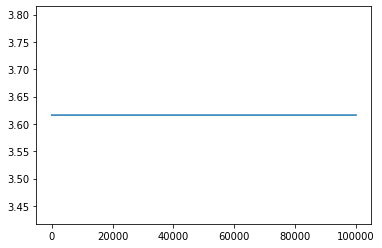

In [65]:
import matplotlib.pyplot as plt

with tf.Graph().as_default():
    #tf.set_random_seed(77777)

    x = tf.placeholder(tf.float32, shape=[None,8])
    y = tf.placeholder(tf.float32, shape=[None,1])
    
    W = tf.Variable(tf.random_normal([8,1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
    
    y_hat = tf.matmul(x, W) + b
    
    loss = tf.reduce_mean(tf.square(y - y_hat))
     
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-8)
    train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        cost_history = []
        for step in range(100000):
            cost, hypothesis, _ = sess.run([loss, y_hat, train], 
                                           feed_dict={x:x_data, y:y_data})
            cost_history.append(cost)
            if (step % 10000 == 0):
                print(step, cost, sess.run([W, b]))
        print(step, cost, sess.run([W, b]))        
        
        plt.plot(cost_history)
        plt.show()

In [67]:
x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b) #1.0 / (1 + tf.exp(-(tf.matmul(X,W) + b)))
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, cost_val)
    
    h, c, a = sess.run([hypothesis, predicted, accuracy], 
                       feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: ", h,
          "\nPredicted: ", c,
          "\nAccuracy: ", a)

0 1.0543793
200 0.5073015
400 0.45209
600 0.42129433
800 0.40034854
1000 0.38398686
1200 0.37006602
1400 0.35762382
1600 0.34619156
1800 0.33552405
2000 0.32548323
2200 0.31598455
2400 0.30697176
2600 0.2984038
2800 0.29024836
3000 0.28247827
3200 0.27506953
3400 0.26800087
3600 0.26125225
3800 0.2548053
4000 0.24864297
4200 0.24274904
4400 0.23710847
4600 0.2317071
4800 0.22653167
5000 0.22156966
5200 0.2168094
5400 0.21224
5600 0.20785105
5800 0.20363301
6000 0.19957684
6200 0.195674
6400 0.19191651
6600 0.18829705
6800 0.18480854
7000 0.18144436
7200 0.1781984
7400 0.17506476
7600 0.1720381
7800 0.1691132
8000 0.16628534
8200 0.16354977
8400 0.16090244
8600 0.15833916
8800 0.15585612
9000 0.15344985
9200 0.1511168
9400 0.14885388
9600 0.14665811
9800 0.14452648
10000 0.14245634

Hypothesis:  [[0.02783572]
 [0.154714  ]
 [0.29065222]
 [0.7879533 ]
 [0.9436407 ]
 [0.9815419 ]] 
Predicted:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
